In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.colors as mcolors

In [2]:
def ratr_contrails(time_horizon, sensitivity_rf_contrails, ratio_erf_rf_contrails, efficacy_erf_contrails):
    ratr = 6.25e14 * sensitivity_rf_contrails * ratio_erf_rf_contrails * efficacy_erf_contrails / time_horizon**0.843
    return ratr

time_horizon = 100
ratio_erf_rf_contrails = 0.42
efficacy_erf_contrails = 1

<xarray.Dataset> Size: 3MB
Dimensions:       (lat: 180, lon: 360)
Coordinates:
  * lat           (lat) float64 1kB -89.5 -88.5 -87.5 -86.5 ... 87.5 88.5 89.5
  * lon           (lon) float64 3kB 0.5 1.5 2.5 3.5 ... 356.5 357.5 358.5 359.5
Data variables:
    RF_net        (lat, lon) float32 259kB ...
    areacella     (lat, lon) float64 518kB ...
    EF            (lat, lon) float64 518kB ...
    RF_lin        (lat, lon) float64 518kB ...
    EF_lin        (lat, lon) float64 518kB ...
    RF_lin_cotra  (lat, lon) float64 518kB ...
    EF_lin_cotra  (lat, lon) float64 518kB ...
Attributes:
    regrid_method:  conservative
Moyenne globale de RF_lin (hors NaN) : 2.211e-12


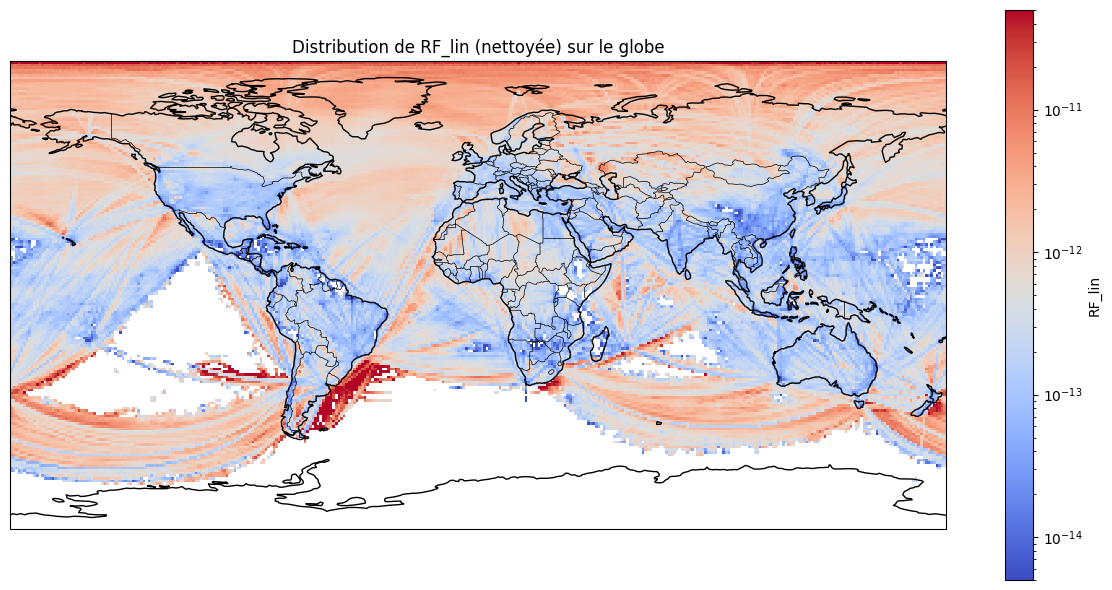

In [3]:
file_path = 'EF_and_RF_per_contrail_length_2019.nc'
ds = xr.open_dataset(file_path)
print(ds)

# Extraire la variable 'RF_lin' et empiler les dimensions lat/lon
rf_lin_cleaned = ds['RF_lin'].where(np.isfinite(ds['RF_lin']), np.nan)/10**6/10**9*5
mean_rf_lin = rf_lin_cleaned.mean().item()

print(f"Moyenne globale de RF_lin (hors NaN) : {mean_rf_lin:.3e}")

vmin = 5e-15#np.nanmin(rf_transformed)
vmax = 5e-11#np.nanmax(rf_transformed)

# Tracer la carte
plt.figure(figsize=(12, 6))

# Projection de la carte (Plate Carrée pour une grille régulière)
ax = plt.axes(projection=ccrs.PlateCarree())
rf_plot = plt.pcolormesh(ds['lon'], ds['lat'], rf_lin_cleaned,
                         transform=ccrs.PlateCarree(), cmap='coolwarm',
                         norm=mcolors.LogNorm(vmin=vmin, vmax=vmax))

# Ajouter les côtes et autres éléments
ax.coastlines()
ax.add_feature(cfeature.BORDERS, linewidth=0.5)
ax.set_global()
plt.colorbar(rf_plot, label='RF_lin')
plt.title("Distribution de RF_lin (nettoyée) sur le globe")
plt.tight_layout()

plt.show()

-7.556105933293088e-12 1.7105718587187914e-09
Mean value for r-ATR: 1.196e+01


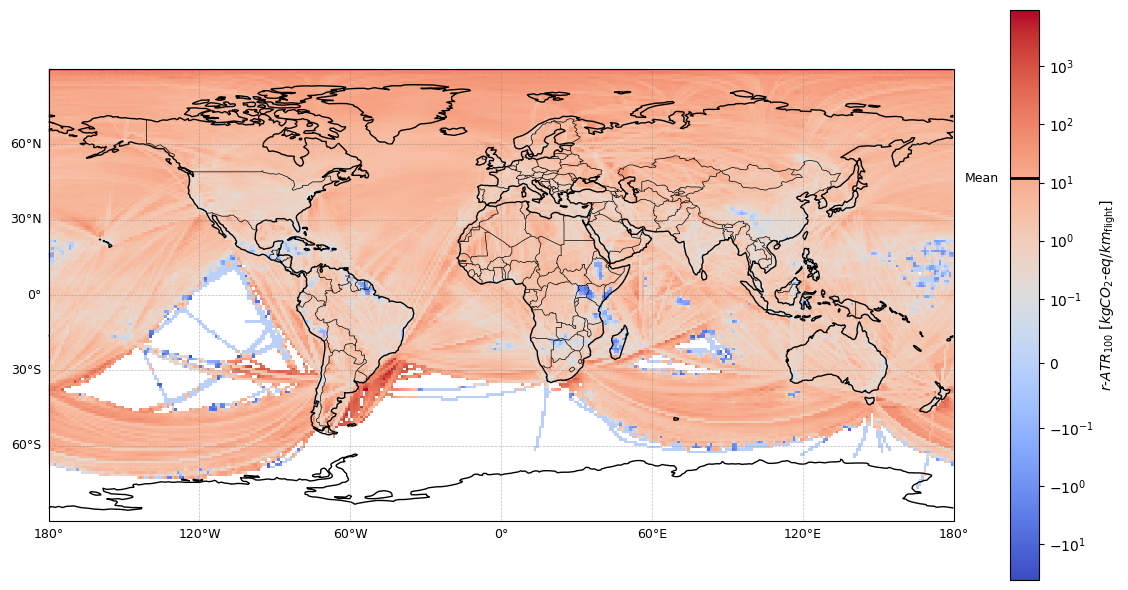

In [14]:
rf_lin_cleaned = ds['RF_lin'].where(np.isfinite(ds['RF_lin']), np.nan)/10**6/10**9*5
rf_transformed = ratr_contrails(time_horizon, rf_lin_cleaned, ratio_erf_rf_contrails, efficacy_erf_contrails)
mean_rf_transformed = rf_transformed.mean().item()

vmin = np.nanmin(rf_lin_cleaned)
vmax = np.nanmax(rf_lin_cleaned)
print(vmin, vmax)

print(f"Mean value for r-ATR: {mean_rf_transformed:.3e}")

vmin = np.nanmin(rf_transformed)
vmax = np.nanmax(rf_transformed)

plt.figure(figsize=(12, 6))
ax = plt.axes(projection=ccrs.PlateCarree())
rf_plot = plt.pcolormesh(ds['lon'], ds['lat'], rf_transformed,
                         transform=ccrs.PlateCarree(), cmap='coolwarm',
                         norm=mcolors.SymLogNorm(linthresh=0.1, linscale=1, vmin=vmin, vmax=vmax, base=10))

ax.add_feature(cfeature.COASTLINE, linewidth=1)
ax.add_feature(cfeature.BORDERS, linewidth=0.5)
ax.set_global()

gl = ax.gridlines(draw_labels=True, linewidth=0.5, color='gray', alpha=0.5, linestyle='--')
gl.top_labels = False
gl.right_labels = False
gl.xlabel_style = {'size': 9}
gl.ylabel_style = {'size': 9}

reference_value = mean_rf_transformed
cbar = plt.colorbar(rf_plot, orientation='vertical', pad=0.05, label=r'$r\text{-}ATR_{100}$ [$kgCO_2\text{-}eq/km_{\text{flight}}$]')
cbar.ax.hlines(reference_value, xmin=0, xmax=1, colors='black', linewidth=2, transform=cbar.ax.get_yaxis_transform())
cbar.ax.text(
    -1,                    # Position en x (juste à droite de la colorbar)
    reference_value,         # Position en y (la même que le trait)
    'Mean',             # Texte à afficher
    va='center',             # Alignement vertical centré sur la ligne
    ha='center',             # Alignement horizontal à gauche du point (donc vers la droite)
    fontsize=9,
    color='black',
    transform=cbar.ax.get_yaxis_transform()
)

plt.tight_layout()

plt.show()

Mean value for r-ATR: 5.843e+01


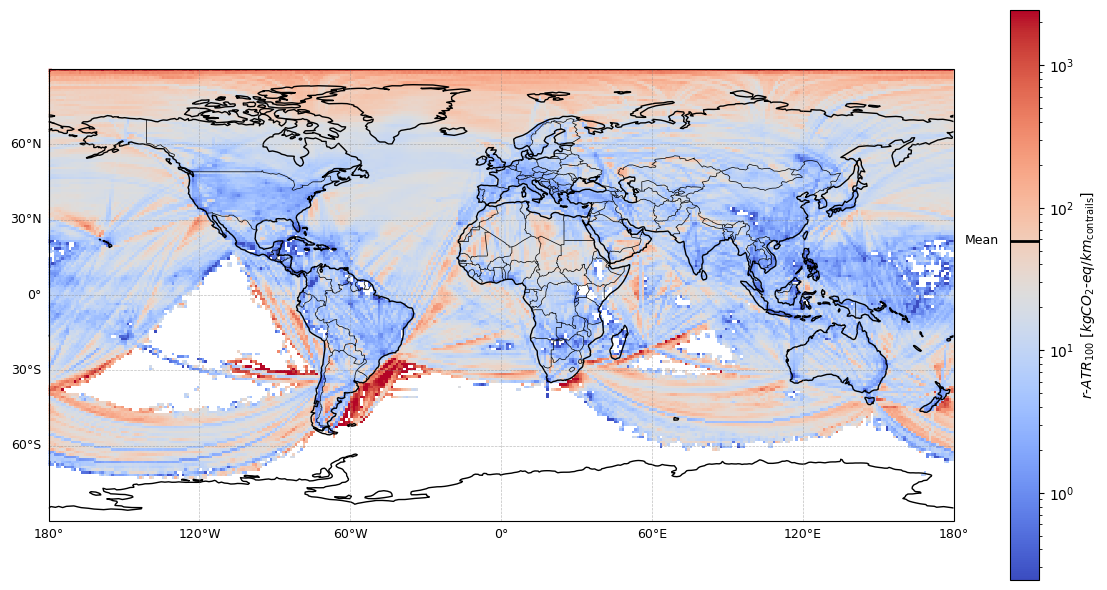

In [5]:
rf_lin_cleaned = ds['RF_lin_cotra'].where(np.isfinite(ds['RF_lin_cotra']), np.nan)/10**6/10**9*5
rf_transformed = ratr_contrails(time_horizon, rf_lin_cleaned, ratio_erf_rf_contrails, efficacy_erf_contrails)
mean_rf_transformed = rf_transformed.mean().item()

print(f"Mean value for r-ATR: {mean_rf_transformed:.3e}")

vmin = 0.05*4.88#np.nanmin(rf_transformed)
vmax = 500*4.88#np.nanmax(rf_transformed)


plt.figure(figsize=(12, 6))
ax = plt.axes(projection=ccrs.PlateCarree())
rf_plot = plt.pcolormesh(ds['lon'], ds['lat'], rf_transformed,
                         transform=ccrs.PlateCarree(), cmap='coolwarm',
                         norm=mcolors.LogNorm(vmin=vmin, vmax=vmax))

ax.add_feature(cfeature.COASTLINE, linewidth=1)
ax.add_feature(cfeature.BORDERS, linewidth=0.5)
ax.set_global()

gl = ax.gridlines(draw_labels=True, linewidth=0.5, color='gray', alpha=0.5, linestyle='--')
gl.top_labels = False
gl.right_labels = False
gl.xlabel_style = {'size': 9}
gl.ylabel_style = {'size': 9}

reference_value = mean_rf_transformed
cbar = plt.colorbar(rf_plot, orientation='vertical', pad=0.05, label=r'$r\text{-}ATR_{100}$ [$kgCO_2\text{-}eq/km_{\text{contrails}}$]')
cbar.ax.hlines(reference_value, xmin=0, xmax=1, colors='black', linewidth=2, transform=cbar.ax.get_yaxis_transform())
cbar.ax.text(
    -1,                    # Position en x (juste à droite de la colorbar)
    reference_value,         # Position en y (la même que le trait)
    'Mean',             # Texte à afficher
    va='center',             # Alignement vertical centré sur la ligne
    ha='center',             # Alignement horizontal à gauche du point (donc vers la droite)
    fontsize=9,
    color='black',
    transform=cbar.ax.get_yaxis_transform()
)

plt.tight_layout()

plt.show()

-0.054537125 1.1969224


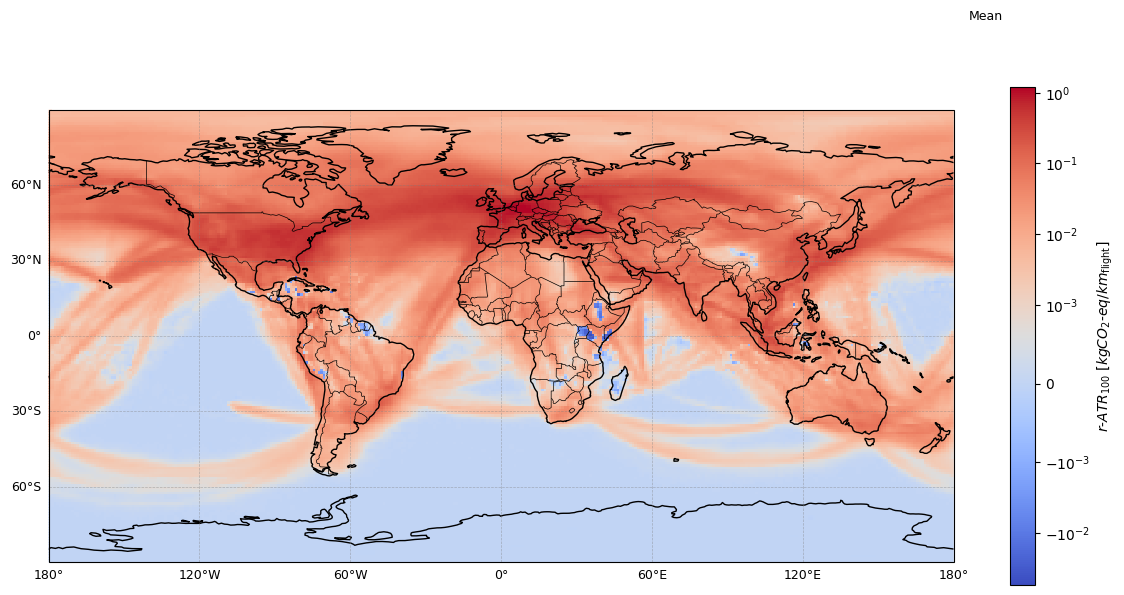

In [16]:
rf_lin_cleaned = ds['RF_net'].where(np.isfinite(ds['RF_net']), np.nan)

vmin = np.nanmin(rf_lin_cleaned)
vmax = np.nanmax(rf_lin_cleaned)
print(vmin, vmax)

plt.figure(figsize=(12, 6))
ax = plt.axes(projection=ccrs.PlateCarree())
rf_plot = plt.pcolormesh(ds['lon'], ds['lat'], rf_lin_cleaned,
                         transform=ccrs.PlateCarree(), cmap='coolwarm',
                         norm=mcolors.SymLogNorm(linthresh=0.001, linscale=1, vmin=vmin, vmax=vmax, base=10))

ax.add_feature(cfeature.COASTLINE, linewidth=1)
ax.add_feature(cfeature.BORDERS, linewidth=0.5)
ax.set_global()

gl = ax.gridlines(draw_labels=True, linewidth=0.5, color='gray', alpha=0.5, linestyle='--')
gl.top_labels = False
gl.right_labels = False
gl.xlabel_style = {'size': 9}
gl.ylabel_style = {'size': 9}

reference_value = mean_rf_transformed
cbar = plt.colorbar(rf_plot, orientation='vertical', pad=0.05, label=r'$r\text{-}ATR_{100}$ [$kgCO_2\text{-}eq/km_{\text{flight}}$]')
cbar.ax.hlines(reference_value, xmin=0, xmax=1, colors='black', linewidth=2, transform=cbar.ax.get_yaxis_transform())
cbar.ax.text(
    -1,                    # Position en x (juste à droite de la colorbar)
    reference_value,         # Position en y (la même que le trait)
    'Mean',             # Texte à afficher
    va='center',             # Alignement vertical centré sur la ligne
    ha='center',             # Alignement horizontal à gauche du point (donc vers la droite)
    fontsize=9,
    color='black',
    transform=cbar.ax.get_yaxis_transform()
)

plt.tight_layout()

plt.show()